In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf   #导入模块
from patsy import dmatrices

In [7]:
dat = sm.datasets.get_rdataset("Guerry","HistData").data  #加载数据,网络原因，可能需要执行多次
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [8]:
vars = ['Department','Lottery','Literacy','Wealth','Region']     #提取回归需要的特征变量
dat = dat[vars]
dat.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [9]:
dat = dat.dropna()  #去除缺失值

In [10]:
y,X = dmatrices('Lottery ~ Literacy + Wealth + Region',data = dat,return_type = 'dataframe') #构造向量矩阵

In [11]:
print(y.head())
X.head()

   Lottery
0     41.0
1     38.0
2     66.0
3     80.0
4     79.0


,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


In [12]:
mod = sm.OLS(y,X) #返回一个mod对象

In [13]:
res = mod.fit()   #回归拟合
print(res.summary())  #查看结果

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           1.07e-05
Time:                        19:00:14   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [14]:
res.params #查看参数属性

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [15]:
res.rsquared # 查看R方

0.337950869192882

In [16]:
dir(res) #返回所有属性名

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [17]:
result = sm.graphics.plot_partregress('Lottery','Wealth',['Region'],data = dat, obs_labels=False)# 列表中的参数表示|X,表示条件概率中的条件

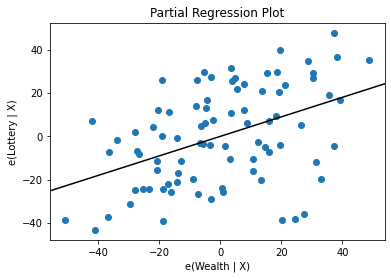

In [18]:
result = sm.graphics.plot_partregress('Lottery','Wealth',['Region','Literacy'],data = dat, obs_labels=False) 

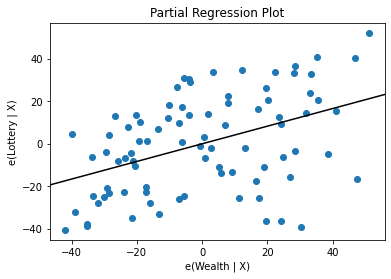

In [19]:
result = sm.graphics.plot_partregress('Lottery','Wealth',['Literacy'],data = dat, obs_labels=False)

In [25]:
res2 = smf.ols(formula='Lottery ~ Literacy : Wealth', data=dat).fit()  #回归交叉项，领略 ：与*的区别，前者只针对交叉项，后者将原始向也纳入回归方程

In [26]:
print(res2.summary())   #查看结果

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.286
Date:                Thu, 01 Oct 2020   Prob (F-statistic):              0.134
Time:                        19:01:58   Log-Likelihood:                -391.67
No. Observations:                  85   AIC:                             787.3
Df Residuals:                      83   BIC:                             792.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          37.8381      4.348     

In [27]:
res1 = smf.ols(formula='Lottery ~ Literacy * Wealth', data=dat).fit()   #做回归
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.06
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           1.32e-06
Time:                        19:03:00   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             762.3
Df Residuals:                      81   BIC:                             772.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.6348     15.825     

In [29]:
res = smf.ols(formula='Lottery ~ np.log(Literacy)', data=dat).fit()  #非线性转化为线性回归
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           0.000144
Time:                        19:05:15   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          115.6091     18.374  

In [30]:
#也可以使用自定义函数作为整体  回归
def log_plus_1(x):
    return np.log(x) + 1
res3 = smf.ols(formula = 'Lottery ~ log_plus_1(Literacy)',data=dat).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           0.000144
Time:                        19:10:35   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              136.0031 

In [ ]:
# statsmodels使用R语言风格的操作方式

In [32]:
f = 'Lottery ~ Literacy + Wealth + Region'
y,X = dmatrices(f,dat,return_type = 'dataframe')
y.head()
X.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


In [33]:
print(smf.ols(f,dat).fit().summary())    #简洁清晰

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           1.07e-05
Time:                        19:27:19   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [35]:
print(sm.OLS(y,X).fit().summary())   #此种方式要建立在dmatrices操作后的基础上

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           1.07e-05
Time:                        19:28:00   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      